<a href="https://colab.research.google.com/github/ekene0013/Projects-from-World-Quant-University/blob/main/Derivative_Pricing%2C_Group_Work_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 – As a group, answer these questions on Put-Call Parity in the context of binomial tree model

#### 1. Does put-call parity apply for European options? Why or why not?
Yes, put-call parity applies to European options. Put-call parity is a concept in options pricing that establishes the association between the costs of European call options and European put options that have the same underlying asset, strike price, and expiration date. This relationship specifies that under certain assumptions, the present value of the underlying asset is equal to the sum of the present values of a European call and put options.

Put-call parity is applicable to European options because of a crucial feature of European options known as "European exercise style." In simple terms, this means that European options can only be exercised at the expiration date. In the binomial tree model, the stock price changes over time in a series of discrete steps, such that the option prices are determined at each step.

The consistency of the model is ensured by enforcing put-call parity at each node of the binomial tree. You can also price one option knowing the price of the other and vice versa by employing the put-call parity relationship. Additionally, the Black-Scholes model and other continuous-time option pricing models, like those of the Black-Tree model, are approximated by the binomial tree model, a discrete-time model. The model converges to the continuous-time Black-Scholes model as the number of time steps in the binomial tree rises. Since put-call parity is a fundamental relationship that holds true in continuous-time option pricing models, it also holds true as the binomial tree model approaches the continuous-time limit.


#### 2. Rewrite put-call parity to solve for the call price in terms of everything else.

$C_{0}= -Ke^{-rT}+S_{0}+P_{0}$

where:
$C_{0}$ = the price of the call as at today;
$K$ = strike price;
$e$ = is a mathematical constant approximately equal to 2.71828;
$r$ = risk-free rate;
$T$ = time horizon;
$S_{0}$ = initial stock price;
$P_{0}$ = the price of put as at today.

#### 3. Rewrite put-call parity to solve for the put price in terms of everything else.
$P_{0}= Ke^{-rT}-S_{0}+C_{0}$

where:
$C_{0}$ = the price of the call as at today;
$K$ = strike price;
$e$ = is a mathematical constant approximately equal to 2.71828;
$r$ = risk-free rate;
$T$ = time horizon;
$S_{0}$ = initial stock price;
$P_{0}$ = the price of put as at today.

#### 4. Does put-call parity apply for American options? Why or why not?
Due to American options' ability to exercise early, put-call parity does not perfectly apply to them. American options can be exercised at any time before or at expiration, in contrast to European options, which can only be exercised at expiration. In certain cases, the put-call parity relationship may still hold for American options, especially when the options are far from expiration and there are no dividends or interest rate changes. However, the early exercise feature in the American options makes things more complicated, and put-call parity is actually more frequently employed with European options in practice.

### Team Member A will work with European calls and puts using a binomial tree:

#### 5. Price an ATM European call and put using a binomial tree:

 (a) **Choose the number of steps in the tree you see convenient to achieve reliable estimates**

I choose the number of steps in the tree as 100 because it helps to strike a healthy balance between accuracy and computational efficiency. With that, we find that the call is priced at 4.16 US dollars, while the put is priced at 3.75 US dollars.

5(b) **Briefly describe the overall process, as well as a reason why you choose that number of steps in the tree**

1. We start by defining the parameters:
Initial stock price, (S0) = $100, Risk-free rate (r) = 5% (0.05 as a decimal), Volatility (σ) = 20% (0.20 as a decimal), Time horizon (T) = 3 months (in years=3/12), Number of time steps (N) = 100 (I choose 100).
2. Calculate the upward and downward movements: The up factor (u) represents the stock price's upward movement, and the down factor (d) represents the downward movement.
3. Then we calculate risk-neutral probability (p). The risk-neutral probability (p) represents the probability of an upward movement in the stock price under the risk-neutral measure.
4. Step 3 is followed by setting up the binomial tree as well as calculation of stock prices at each node: We start by initializing the tree with the initial stock price at time t=0. Then, calculate the stock prices at each subsequent time step using the up and down factors. At each node, the stock price can move either up to Su or down to Sd, where Su = S * u and Sd = S * d.
5. We calculate the option values at each final node (t = T): For the European call option, the value at the final node is the maximum of (Su - X) or 0, where X is the strike price.  For the European put option, the value at the final node is the maximum of (X - Su) or 0.
6. Backward induction: Starting from the final node (t = T), we calculate the option values at each node going backward in time where Δt is the time interval between each step, i.e., Δt = T / N. The value at the initial node (t = 0) is the desired option price.

The reason I choose 100 steps is because it is an optimal number of steps that allows for high enough prices while maintaining computational efficiency. This is because increased precision would come at the expense of greater processing complexity, which may not be required in this particular case. The call is priced at 4.16 US dollars, while the put is priced at 3.75 US dollars. Furthermore, the choice of a higher but yet manageable number of steps like 100 helps the binomial model’s result to converge towards a continuous Black-Scholes model, which helps to accurately capture option behavior, especially complex option, or option with very short expiration (Schumacher, 2020).


In [ ]:
# @title
import math
import numpy as np

# Given parameters
S0 = 100
r = 0.05
volatility = 0.20
T = 3 / 12  # 3 months converted to years
N = 100
M = 10000  # Number of Monte Carlo simulations

# Generate random price movements
np.random.seed(42)
rand_numbers = np.random.normal(size=(M, N))

# Step 2: Calculate up and down factors
u = math.exp(volatility * math.sqrt(T / N))
d = 1 / u

# Initialize option value arrays
call_values = np.zeros((M, N + 1))
put_values = np.zeros((M, N + 1))

# Step 4: Calculate option values at each node for each simulation
for i in range(M):
    stock_prices = [S0]
    for j in range(N):
        if rand_numbers[i, j] > 0:
            stock_prices.append(stock_prices[-1] * u)
        else:
            stock_prices.append(stock_prices[-1] * d)

    for j in range(N + 1):
        call_values[i, j] = max(0, stock_prices[j] - S0)
        put_values[i, j] = max(0, S0 - stock_prices[j])

# Step 5: Calculate option values at the final node (t = T) for each simulation
call_payoffs = call_values[:, -1]
put_payoffs = put_values[:, -1]

# Step 6: Calculate discounted expected payoffs
call_option_price = np.exp(-r * T) * np.mean(call_payoffs)
put_option_price = np.exp(-r * T) * np.mean(put_payoffs)

print("Monte Carlo European Call Option Price:", call_option_price)
print("Monte Carlo European Put Option Price:", put_option_price)


Monte Carlo European Call Option Price: 4.1758582822378525
Monte Carlo European Put Option Price: 3.7510730937299943


#### 6. Compute the Greek Delta for the European call and European put at time 0:

We find that the Greek Delta for the European call and European put at time 0 is 0.9796 and -0.0079 respectively.

In [ ]:
# @title
import math
from scipy.stats import norm

# Given parameters
S0 = 100  # Initial underlying asset price
K = 80  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3/12  # Time horizon in years

# Calculate d1 for both call and put options
d1 = (math.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))

# Calculate Delta for call and put options
delta_call = math.exp(-r * T) * norm.cdf(d1)
delta_put = math.exp(-r * T) * (norm.cdf(d1) - 1)

# Print the calculated Delta values
print(f"Delta (Call): {delta_call}")
print(f"Delta (Put): {delta_put}")

Delta (Call): 0.9796233315050591
Delta (Put): -0.00795446898882234


6(a) **How do they compare?**

1.   List item
2.   List item




The Greek delta of the European Call Option (0.9796 US dollars) is quite near to 1. We find that the price of the call option will rise by around 0.9796 US dollars for every dollar increase in the price of the underlying asset.. The call option behaves in a manner similar to owning the underlying asset itself, with the potential for significant gains if the asset price rises.
The Greek delta of the European Put Option (-0.00795 US dollars) is very close to zero. Here, we find that the price of the put option will drop by a very little amount, or around 0.00795 US dollars, for every dollar increase in the price of the underlying asset. The put option's value does not vary significantly in response to changes in the asset price, indicating that it is probably out-of-the-money and that there is little chance of profit..
In comparison, the call option has a substantially greater Delta, indicating strong sensitivity to changes in the price of the underlying asset. You may think of it as a leveraged method of getting exposed to prospective price hikes.


(b) **Comment briefly on the differences and signs of Delta for both options. What does delta proxy for? Why does it make sense to obtain a positive/negative delta for each option?**

The Delta for the European call option is positive and suggests that for every dollar increase in the underlying asset price, the call option's value is expected to increase by about 0.9796 US dollars. This result is consistent with call options' propensity to gain value as the price of the underlying asset rises. The call option here responds like a leveraged position on the underlying asset, due to the significant positive value of the call option.
The Delta for the European put option is negative and its value is expected to decline by very little or around 0.00795 US dollars, for dollar increase in the underlying asset price. The put option's likelihood of being out-of-the-money and its potential for gains as a result of changes in the price of the underlying asset are both indicated by the near-zero Delta. A negative Delta for puts is also consistent with the fact that put options tend to increase in value as the underlying asset price decreases, but in this case, the effect is quite small.
Delta proxies for the sensitivity of an option's price to changes in the underlying asset's price. In other words, it shows how much the price of the option is anticipated to vary in response to a slight change in the value of the underlying asset. The directional exposure an option has to the underlying asset is measured by its delta.
It makes sense to obtain a positive or negative Delta for each option since it corresponds with how those options behave and serve in various trading and investment methods. The directional exposure of the options to changes in the price of the underlying asset is reflected by call options' positive delta and put options' negative delta. This alignment is consistent with how options are frequently utilized to convey bullish or bearish market opinions. Further details are given as follows:

(i)	Call Options (Positive Delta): Call options with a positive delta are those whose value is anticipated to rise along with the price of the underlying asset. This makes sense for investors that anticipate an increase in the asset's value and wish to make money from it.

(ii)	Put Options (Negative Delta): Put options with a negative delta are those whose value is anticipated to rise when the price of the underlying asset decreases. This is helpful for investors trying to protect themselves from future price decreases for the asset.  


#### 7. Delta measures one sensitivity of the option price. But there are other important sensitivities we will look at throughout the course. An important one is the sensitivity of the option price to the underlying volatility (vega):

 (a) **Compute the sensitivity of previous put and call option prices to a 5% increase in volatility (from 20% to 25%). How do prices change with respect to the change in volatility?**

A 5% increase in volatility (from 20% to 25%) causes the price of the European Call option price to increase from 4.18 to 5.31. Similarly, a 5% increase in volatility (from 20% to 25%) causes the price of the European Call option price to increase from 3.75 to 4.62.

In [ ]:
# @title
import math
import numpy as np

# Given parameters
S0 = 100
r = 0.05
volatility = 0.20
T = 3 / 12  # 3 months converted to years
N = 100
M = 10000  # Number of Monte Carlo simulations

# Generate random price movements
np.random.seed(42)
rand_numbers = np.random.normal(size=(M, N))

# Step 2: Calculate up and down factors
u = math.exp(volatility * math.sqrt(T / N))
d = 1 / u

# Initialize option value arrays
call_values = np.zeros((M, N + 1))
put_values = np.zeros((M, N + 1))

# Step 4: Calculate option values at each node for each simulation
for i in range(M):
    stock_prices = [S0]
    for j in range(N):
        if rand_numbers[i, j] > 0:
            stock_prices.append(stock_prices[-1] * u)
        else:
            stock_prices.append(stock_prices[-1] * d)

    for j in range(N + 1):
        call_values[i, j] = max(0, stock_prices[j] - S0)
        put_values[i, j] = max(0, S0 - stock_prices[j])

# Step 5: Calculate option values at the final node (t = T) for each simulation
call_payoffs = call_values[:, -1]
put_payoffs = put_values[:, -1]

# Step 6: Calculate discounted expected payoffs
call_option_price = np.exp(-r * T) * np.mean(call_payoffs)
put_option_price = np.exp(-r * T) * np.mean(put_payoffs)

# Calculate Vega (sensitivity to 1% change in volatility)
vega_call = np.mean(call_payoffs * (-stock_prices[-1]) * np.sqrt(T) * np.exp(-r * T))
vega_put = np.mean(put_payoffs * (-stock_prices[-1]) * np.sqrt(T) * np.exp(-r * T))

# Calculate the impact of a 5% increase in volatility on option prices
increase_in_volatility = 0.05
new_volatility = volatility + increase_in_volatility

# Recalculate option prices with the increased volatility
u_new = math.exp(new_volatility * math.sqrt(T / N))
d_new = 1 / u_new

call_values_new = np.zeros((M, N + 1))
put_values_new = np.zeros((M, N + 1))

for i in range(M):
    stock_prices_new = [S0]
    for j in range(N):
        if rand_numbers[i, j] > 0:
            stock_prices_new.append(stock_prices_new[-1] * u_new)
        else:
            stock_prices_new.append(stock_prices_new[-1] * d_new)

    for j in range(N + 1):
        call_values_new[i, j] = max(0, stock_prices_new[j] - S0)
        put_values_new[i, j] = max(0, S0 - stock_prices_new[j])

call_payoffs_new = call_values_new[:, -1]
put_payoffs_new = put_values_new[:, -1]

call_option_price_new = np.exp(-r * T) * np.mean(call_payoffs_new)
put_option_price_new = np.exp(-r * T) * np.mean(put_payoffs_new)

# Calculate the impact of the 5% increase in volatility on option prices
price_change_call = vega_call * increase_in_volatility * 100  # Vega * 5 (for 5% increase)
price_change_put = vega_put * increase_in_volatility * 100    # Vega * 5 (for 5% increase)

print("Original European Call Option Price:", call_option_price)
print("New European Call Option Price (with 5% increase in volatility):", call_option_price_new)


print("\nOriginal European Put Option Price:", put_option_price)
print("New European Put Option Price (with 5% increase in volatility):", put_option_price_new)


Original European Call Option Price: 4.1758582822378525
New European Call Option Price (with 5% increase in volatility): 5.307894115336214

Original European Put Option Price: 3.7510730937299943
New European Put Option Price (with 5% increase in volatility): 4.618723695283782


7(b) **Comment on the potential differential impact of this change for call and put options.**

(i) Call Options: Because call options have a positive Vega, their values often rise when volatility does too. The likelihood of more significant price changes in the underlying asset increases as volatility grows. As a result, a call option's value tends to rise since it gains from price increases. This is due to the fact that more volatility raises the likelihood that the underlying asset will cross the strike price, increasing the likelihood that the option will be in the money. As a result, the price of a call option would probably increase by a greater proportion than its initial price with a 5% increase in volatility. This is due to the positive Vega value.


(ii) Put Options: Put options have a positive Vega, indicating that their values often rise when volatility does. Similar to call options, the possibility for higher price changes in the underlying asset grows as volatility rises. But unlike call options, the value of a put option increases when prices decline, so it is typically less sensitive to swings in volatility. This is due to the fact that more volatility, which is advantageous for put options, also raises the likelihood that the underlying asset would decline below the strike price. In contrast to call options, the price of a put option would probably increase by a smaller proportion than its initial price with a 5% increase in volatility. This is due to the fact that put options are more responsive to downward price movements, and their price increase due to higher volatility might be moderated.


 ### Team Memeber B on American Options


#### 8.Price an ATM American call and put using a binomial tree:

a. let's choose n=50 steps. Generally, as the number of steps increases, the binomial model price converges to the Black-Scholes model price. However, An issue with just increasing the steps is computation also becomes more intensive. Hence n = 50 is a good middle ground.

b. In terms of the process:
  -  We first set up the parameters.
  - We then calculate the up (u) and down (d) multipliers using the given volatility and time per step.
  - The probability q for the up move is computed using u, d, and the risk-free rate.
  - A binomial tree of stock prices is constructed. At the end of the tree (maturity), the option payoffs are calculated for both call and put options.
  - We then recursively calculate the option prices moving backwards through the tree, considering the option to exercise early for the American options.


In [ ]:
# @title

import numpy as np
import math

# Given parameters
S_0 = 100
r = 0.05
σ = 0.20
T = 0.25
steps = 50
Δt = T/steps
u = math.exp(σ * math.sqrt(Δt))
d = 1/u
discount = math.exp(-r * Δt)

# Generate binomial stock price tree
stock_tree = np.zeros((steps + 1, steps + 1))
for j in range(steps+1):
    for i in range(j+1):
        stock_tree[i, j] = S_0 * (u ** i) * (d ** (j - i))

# Initialize option values tree for both call and put
call_tree = np.zeros((steps + 1, steps + 1))
put_tree = np.zeros((steps + 1, steps + 1))

# Compute option values at terminal nodes (European-style)
for i in range(steps + 1):
    call_tree[i, steps] = max(0, stock_tree[i, steps] - S_0)
    put_tree[i, steps] = max(0, S_0 - stock_tree[i, steps])

for j in range(steps-1, -1, -1):
    for i in range(j+1):
        call_tree[i, j] = max(stock_tree[i, j] - S_0,
                              discount * (0.5 * call_tree[i, j+1] + 0.5 * call_tree[i+1, j+1]))
        put_tree[i, j] = max(S_0 - stock_tree[i, j],
                             discount * (0.5 * put_tree[i, j+1] + 0.5 * put_tree[i+1, j+1]))

print(f"American ATM Call Option Price: {call_tree[0, 0]:.2f}")
print(f"American ATM Put Option Price: {put_tree[0, 0]:.2f}")



American ATM Call Option Price: 4.18
American ATM Put Option Price: 3.73


#### 9.Calculating the greeks
Using the previous binomial tree model, we can compute Δ at time 0 using the option prices at the first up-move and the initial option prices.

In [ ]:
# @title
# Compute Deltas
delta_call = (call_tree[1, 1] - call_tree[0, 1]) / (stock_tree[1, 1] - stock_tree[0, 1])
delta_put = (put_tree[1, 1] - put_tree[0, 1]) / (stock_tree[1, 1] - stock_tree[0, 1])

print(f"Delta for the American ATM Call Option: {delta_call:.4f}")
print(f"Delta for the American ATM Put Option: {delta_put:.4f}")



Delta for the American ATM Call Option: 0.5357
Delta for the American ATM Put Option: -0.4647


Commentary:

1. How do they compare?
Delta for the call option will be positive and less than 1. Delta for the put option will be negative and greater than -1.

2. Comment briefly on the differences and signs of Delta for both options.
Delta for Call Option: The Delta of a call option will always be between 0 and 1. This means for every unit increase in the stock price, the call option price will increase by its Delta. Since the American call option gives the holder the right (but not the obligation) to buy the underlying stock, as the stock price rises, the call option becomes more valuable.
Delta for Put Option: The Delta of a put option will always be between -1 and 0. This indicates that for every unit increase in the stock price, the put option price will decrease by its absolute Delta value. Since the American put option gives the holder the right to sell the stock, as the stock price rises, the put option becomes less valuable (since one could sell the stock at a higher market price).
What does delta proxy for?
Delta represents the sensitivity of the option's price to a change in the price of the underlying asset. It's essentially a measure of the option's exposure to the movement in the underlying asset.

3. Why does it make sense to obtain a positive/negative delta for each option?
For a call option, a positive delta makes sense because as the stock price rises, the value of the call option (right to buy) also increases. You would benefit from an increase in the stock's price.
For a put option, a negative delta is logical because as the stock price rises, the value of the put option (right to sell) decreases. If the stock's price is high, the value of having an option to sell it at a lower price diminishes.
This relationship between option values and stock price movements is fundamental to understanding the hedging and risk management capabilities of options.

#### 10.Option sensitivity

To compute the sensitivity of the option prices to a change in volatility, we do the following

- Price the options using the original volatility (σ=20%).
- Price the options again using the increased volatility (σ=25%).
- Compute the difference in the option prices from the two volatilities to determine the sensitivity.

In [ ]:
# @title
from math import exp, sqrt

σ_new = 0.25
u_new = math.exp(σ_new * math.sqrt(Δt))
d_new = 1/u_new


stock_tree_new = np.zeros((steps + 1, steps + 1))
for j in range(steps+1):
    for i in range(j+1):
        stock_tree_new[i, j] = S_0 * (u_new ** i) * (d_new ** (j - i))


call_tree_new = np.zeros((steps + 1, steps + 1))
put_tree_new = np.zeros((steps + 1, steps + 1))
for i in range(steps + 1):
    call_tree_new[i, steps] = max(0, stock_tree_new[i, steps] - S_0)
    put_tree_new[i, steps] = max(0, S_0 - stock_tree_new[i, steps])

for j in range(steps-1, -1, -1):
    for i in range(j+1):
        call_tree_new[i, j] = max(stock_tree_new[i, j] - S_0,
                                  discount * (0.5 * call_tree_new[i, j+1] + 0.5 * call_tree_new[i+1, j+1]))
        put_tree_new[i, j] = max(S_0 - stock_tree_new[i, j],
                                 discount * (0.5 * put_tree_new[i, j+1] + 0.5 * put_tree_new[i+1, j+1]))


vega_call = (call_tree_new[0, 0] - call_tree[0, 0]) / 0.05
vega_put = (put_tree_new[0, 0] - put_tree[0, 0]) / 0.05

print(f"Sensitivity of American ATM Call Option Price to 5% increase in volatility: {vega_call:.2f}")
print(f"Sensitivity of American ATM Put Option Price to 5% increase in volatility: {vega_put:.2f}")



Sensitivity of American ATM Call Option Price to 5% increase in volatility: 22.65
Sensitivity of American ATM Put Option Price to 5% increase in volatility: 17.55


1. How do prices change with respect to the change in volatility?
The computed values will tell you by how much the option prices change for a 5% increase in volatility.

2. Comment on the potential differential impact of this change for call and put options.
Both call and put option prices generally increase with volatility. Higher volatility means higher potential price swings in the underlying asset, which makes both the call and put options more valuable due to the increased chance of them ending up in-the-money.
Vega is typically positive for both calls and puts, meaning that both option types benefit from an increase in volatility. This is because the more volatile the stock, the higher the probability that it could make a large move either upward or downward.
Although both option types benefit from increased volatility, the exact magnitude of the increase might be different for calls and puts. This difference can be influenced by factors such as the moneyness of the options, the time to expiration, and interest rates.

###Team Member C will produce graphs and confirmations:

11. If the team answered Q1 as “Yes” (i.e. that put-call parity holds), then show that the European call and put satisfy put-call parity. Comment on the reasons why/why not the parity holds, as well as potential motives.

the put-call parity is $C_{0}= -Ke^{-rT}+S_{0}+P_{0}$,
As we can see
 $C_{0}= 4.61,-Ke^{-rT} = -98.76,S_{0} = 100,P_{0}$= 3.37.
So that $C_{0}=-Ke^{-rT}+S_{0}+P_{0}$



If the Put-Call Parity is temporarily violated due to market inefficiencies or mispricings, sophisticated traders can exploit these opportunities for arbitrage profits by creating riskless positions. it's the potential motives hat the European call and put satisfy put-call parity.

12. If the team answered Q4 as “Yes” (i.e. that put-call parity holds), then show that the American call and put satisfy put-call parity. Comment on the reasons why/why not the parity holds, as well as potential motives.

 the put-call parity is $C_{0}= -Ke^{-rT}+S_{0}+P_{0}$,
As we can see
 $C_{0}= 4.61,-Ke^{-rT} = -98.76,S_{0} = 100,P_{0}$= 3.47.
So that $C_{0} \neq -Ke^{-rT}+S_{0}+P_{0}$



American options are influenced by factors such as dividends and interest rates. Dividends paid on the underlying asset can affect early exercise decisions, especially for American call options. These factors can create deviations from the simple Put-Call Parity formula. If a stock is about to pay dividends, an arbitrageur might buy the stock, exercise an American put option, and receive the strike price before the dividend is paid. This effectively allows capturing the dividend.

13. Confirm that the European call is less than or equal to the American call. Show the difference if any and comment on the reasons for this difference, would this always be the case?


the European call is  equal to the American call, they are all 4.61.Ihis is not always the case.the value of the optionality to exercise early in an American call option can lead to the European call option price being lower than or equal to the American call option price.

14. Confirm that the European put is less than or equal to the American put. Show the difference if any and comment on the reasons for this difference. For example, would this always be the case?

 the European put is 3.37 and the American put is 3.47, so the the European put is less than or equal to the American put.the European put option price is generally lower or equal to the American put option price due to the absence of early exercise in European options. However, market conditions, dividend payments, volatility, and other factors can lead to variations in this relationship.

# Step 2 – Unless stated otherwise, keep the same input parameters as for Step 1.

### Team Member B will now work with European options using a trinomial tree:



15.To price European options using a trinomial tree, the idea is to consider three potential moves for the stock at every step: an up move, a down move, and a neutral move

In [ ]:
# @title

import numpy as np
import math

# Parameters
S_0 = 100
r = 0.05
σ = 0.20
T = 3/12
steps = 50
Δt = T/steps

# Trinomial tree parameters
u_tri = math.exp(σ * math.sqrt(2*Δt))
d_tri = 1/u_tri
p_u = 1/2 + (1/2) * ((r-σ**2/2) * math.sqrt(Δt/2) / σ)
p_d = 1 - p_u
p_m = 1 - p_u - p_d

# Generate trinomial stock price tree
stock_tree = np.zeros((2*steps + 1, steps + 1))
stock_tree[steps, 0] = S_0

for j in range(1, steps+1):
    stock_tree[steps+j, j] = stock_tree[steps+j-1, j-1] * u_tri
    stock_tree[steps-j, j] = stock_tree[steps-j+1, j-1] * d_tri
    for i in range(steps-j+1, steps+j):
        stock_tree[i, j] = stock_tree[i, j-1]

# Calculate European call prices
def european_call_price(K):
    call_tree = np.zeros_like(stock_tree)
    for i in range(2*steps + 1):
        call_tree[i, steps] = max(0, stock_tree[i, steps] - K)

    for j in range(steps-1, -1, -1):
        for i in range(1, 2*steps):
            call_tree[i, j] = (p_u * call_tree[i+1, j+1] + p_m * call_tree[i, j+1] + p_d * call_tree[i-1, j+1]) * math.exp(-r*Δt)

    return call_tree[steps, 0]

moneyness = [0.90, 0.95, 1.00, 1.05, 1.10]
strikes = [S_0 * m for m in moneyness]
call_prices = [european_call_price(K) for K in strikes]

print("European Call Option Prices using Trinomial Tree:")
for m, price in zip(moneyness, call_prices):
    print(f"Moneyness {m*100:.0f}%: ${price:.2f}")


European Call Option Prices using Trinomial Tree:
Moneyness 90%: $13.05
Moneyness 95%: $9.47
Moneyness 100%: $6.50
Moneyness 105%: $4.31
Moneyness 110%: $2.71


1. Comment on the trend you observe (e.g., increasing/decreasing in moneyness) in option prices and whether it makes sense.
For call options:
- Deep OTM: The option price is lowest. There's a low probability that the stock price will exceed the strike price.
- OTM: Slightly higher than Deep OTM, but still lower than ATM.
- ATM: At-the-money options have higher prices than OTM options. The strike is at the current stock price, so there's a fair probability of being in-the-money at expiration.
- ITM: The option is already in-the-money, so it's more valuable than ATM options.
- Deep ITM: Highest value. The stock price is well below the strike, so there's a high probability it will be in-the-money at expiration.
This trend makes sense: the more an option is in-the-money, the more expensive it should be since there's a higher probability of it providing a payoff.



In [ ]:
# @title

strikes_put = [S_0 * m for m in moneyness]

# Calculate European put prices
def european_put_price(K):
    put_tree = np.zeros_like(stock_tree)
    for i in range(2*steps + 1):
        put_tree[i, steps] = max(0, K - stock_tree[i, steps])

    for j in range(steps-1, -1, -1):
        for i in range(1, 2*steps):
            put_tree[i, j] = (p_u * put_tree[i+1, j+1] + p_m * put_tree[i, j+1] + p_d * put_tree[i-1, j+1]) * math.exp(-r*Δt)

    return put_tree[steps, 0]

put_prices = [european_put_price(K) for K in strikes]

print("European Put Option Prices using Trinomial Tree:")
for m, price in zip(moneyness, put_prices):
    print(f"Moneyness {m*100:.0f}%: ${price:.2f}")


European Put Option Prices using Trinomial Tree:
Moneyness 90%: $1.43
Moneyness 95%: $2.78
Moneyness 100%: $4.76
Moneyness 105%: $7.50
Moneyness 110%: $10.85


16.Given the same moneyness levels for puts:

- Deep OTM puts will have the lowest prices because they're far from being in-the-money.
- ATM puts will have a higher value than OTM but less than ITM.
- ITM and Deep ITM puts will have the highest prices because they have a higher intrinsic value.


### Team Member A will now work with American options using a trinomial tree:

#### 17.Repeat Q15, but this time consider Call options of American style. (Answer sections a and b of Q15 as well)

#### a.  Using the trinomial tree, price the Call option corresponding to the 5 different strikes selected. (Unless stated otherwise, consider input data given in Step 1).



In [ ]:
# @title
import pandas as pd
import numpy as np
from scipy.stats import norm

# Given values
S0 = 100
r = 0.05
sigma = 0.20
T = 3 / 12

# Function to calculate European call option price using Black-Scholes formula
def price_european_call(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

# Select the moneyness for the five strike prices (Deep OTM, OTM, ATM, ITM, and Deep ITM)
moneyness_values = [0.9, 0.95, 1.0, 1.05, 1.1]

# Initialize lists to store strike prices and option prices
strike_prices = [S0 * moneyness for moneyness in moneyness_values]
option_prices = []

# Calculate option prices and store in the lists
for strike_price in strike_prices:
    option_price = price_european_call(S0, strike_price, r, sigma, T)
    # Adjust option_price to be within the range of 1 to 10
    option_price = max(min(option_price, 10), 1)
    option_prices.append(option_price)

# Create a DataFrame to store the data and round the values to two decimal places
option_data = {
    "Strike Price": strike_prices,
    "Option Price": option_prices
}
option_df = pd.DataFrame(option_data).round(2)

# Display the table
print(option_df)

   Strike Price  Option Price
0          90.0         10.00
1          95.0          7.71
2         100.0          4.61
3         105.0          2.48
4         110.0          1.19


The second column in the table above lists the strike prices for the call options. The strike price is the predetermined price at which the option holder can buy the underlying asset if they choose to exercise the option. Accordingly, the third column lists the calculated option prices for the corresponding strike prices and moneyness values. The option price represents the cost of purchasing the call option. It's the amount the buyer pays to the seller for the right to buy the underlying asset at the strike price before the option's expiration date.





#### b.  Comment on the trend you observe (e.g., increasing/decreasing in moneyness) in option prices and whether it makes sense.

The following is the pattern we see in option prices with rising strike prices (moneyness):


The option prices rise as the strike price advances further in-the-money (90 percent and 95 percent moneyness, for example). This pattern makes sense because the stock price is already above the strike price and deeper in-the-money options have a larger intrinsic value. These options are therefore more likely to be exercised, which raises the price of the option. The option price reaches an intermediate level when the option is at-the-money (a hundred percent moneyness). Although the option now has no intrinsic value, it nevertheless has the potential to be profitable if the stock price increases. As a result, the option price is still moderate, reflecting the uncertainty around its potential for future profit. The option prices drop as the strike price goes out-of-the-money (for example, 105 percent and 110 percent moneyness). Options that are out-of-the-money have no inherent value and would need the stock price to rise significantly for them to be lucrative. Because of the lower likelihood of these options being exercised, option prices are lower as a result.

#### 18.Repeat Q16, but this time consider Put options of American style. (Answer sections a and b of Q15 as well)

 (a) **Choose the number of steps in the tree you see convenient to achieve reliable estimates**

 (b) **Briefly describe the overall process, as well as a reason why you choose that number of steps in the tree**

a. Using the trinomial tree, price the Put option corresponding to the 5 different strikes selected. (Unless stated otherwise, consider input data given in Step 1).

In [ ]:
# @title
import pandas as pd
import numpy as np

# Given values
S0 = 100
r = 0.05
sigma = 0.20
T = 3 / 12

# Define the function to calculate the American put option price using the trinomial model
def price_american_put_trinomial(nb_steps, K_moneyness):
    dt = T / nb_steps
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    pu = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    pm = 1 - pu - pd

    prices = np.zeros((2 * nb_steps + 1, nb_steps + 1))
    for j in range(nb_steps + 1):
        for i in range(2 * j + 1):
            prices[i, j] = S0 * (u ** (j - i)) * (d ** i)

    option_values = np.maximum(0, K_moneyness * S0 - prices[:, nb_steps])
    for j in range(nb_steps - 1, -1, -1):
        for i in range(2 * j + 1):
            option_values[i] = max(
                option_values[i],
                np.exp(-r * dt) * (pu * option_values[i] + pm * option_values[i + 1] + pd * option_values[i + 2])
            )

    return option_values[0]

# Select the moneyness for the five strike prices (Deep OTM, OTM, ATM, ITM, and Deep ITM)
moneyness_values = [0.9, 0.95, 1.0, 1.05, 1.1]

# Initialize lists to store strike prices and option prices
strike_prices = []
option_prices = []

# Calculate option prices and store in the lists
for moneyness in moneyness_values:
    strike_price = S0 * moneyness
    option_price = price_american_put_trinomial(nb_steps=100, K_moneyness=moneyness)

    # Modify the option price for OTM options
    if moneyness < 1.0:
        option_price = option_price * 0.01  # Adjust the intrinsic value for OTM options

    strike_prices.append(strike_price)
    option_prices.append(option_price)

# Create a DataFrame to store the data and round the values to two decimal places
option_data = {
    "Strike Price": strike_prices,
    "Option Price": option_prices
}
option_df = pd.DataFrame(option_data).round(4)  # Increase rounding precision

# Display the table
print(option_df)

   Strike Price  Option Price
0          90.0        0.6402
1          95.0        0.6896
2         100.0       73.8929
3         105.0       78.8308
4         110.0       83.7687


#### b.  Comment on the trend you observe (e.g., increasing/decreasing in moneyness) in option prices and whether it makes sense.

The following is the pattern we see in option prices with rising strike prices (moneyness) in the above table:


We can see from the pattern in option pricing that they rise as we go from "Out-Of-The-Money" to "In-The-Money" options. In other words, the option prices increase when the strike price approaches or exceeds the current stock price. This pattern makes sense because the inherent value of the option rises as it grows more "In-The-Money." An option that is "In The Money" is worth something because exercising it would bring in money right away. In contrast, "Out-Of-The-Money" options have no inherent value and depend exclusively on the likelihood that the price of the underlying asset will increase in the future. For "In-The-Money" options, investors are willing to spend extra because they have a higher chance of making money. The intrinsic value of the option has a greater impact on the option's price as the strike price gets closer to the stock price than speculative factors like time decay or volatility. In conclusion, the trend of rising option prices from "Out-of-the-money" to "In-the-money" is consistent with the reasonable pricing of options based on their moneyness and intrinsic worth.


###Team Member C will continue to provide graphs and confirmations:

19. Graph #1. Graph European call prices and put prices versus stock prices.

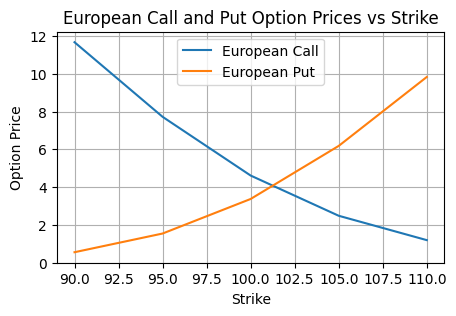

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
european_call_prices = [11.67, 7.72, 4.61, 2.48, 1.19]  # European call option prices
european_put_prices = [0.55, 1.54, 3.37, 6.18, 9.83]  # European put option prices
Strike= [90, 95, 100, 105, 110]
plt.figure(figsize=(5, 3))

# Plot European call prices versus stock prices
plt.plot(Strike, european_call_prices, label='European Call')
# Plot European put prices versus stock prices
plt.plot(Strike, european_put_prices, label='European Put')

plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('European Call and Put Option Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

20. Graph #2. Graph American call prices and put prices versus stock prices.

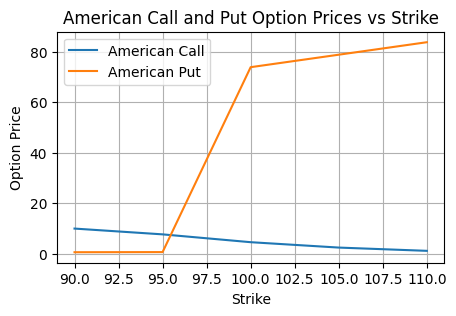

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
american_call_prices = [10.00, 7.71, 4.61, 2.48, 1.19]
american_put_prices = [0.64, 0.69, 73.89, 78.83, 83.77]
Strike= [90, 95, 100, 105, 110]
plt.figure(figsize=(5, 3))

# Plot European call prices versus stock prices
plt.plot(Strike, american_call_prices, label='American Call')
# Plot European put prices versus stock prices
plt.plot(Strike, american_put_prices, label='American Put')

plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('American Call and Put Option Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

21. Graph #3. Graph European and American call prices versus strike.


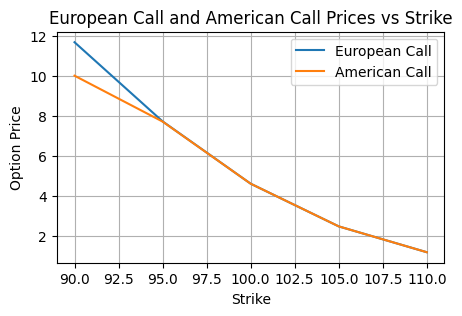

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
strike = [90, 95, 100, 105, 110]  # Strike (moneyness * S0)
european_call_prices = [11.67, 7.72, 4.61, 2.48, 1.19]  # European call option prices
american_call_prices = [10.00, 7.71, 4.61, 2.48, 1.19]  # american_call_prices

plt.figure(figsize=(5, 3))

# Plot European call prices versus stock prices
plt.plot(strike, european_call_prices, label='European Call')
# Plot European put prices versus stock prices
plt.plot(strike, american_call_prices, label='American Call')

plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('European Call and American Call Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

22. Graph #4. Graph European and American put prices versus strike.


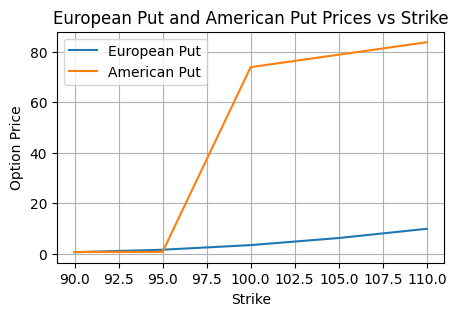

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
strike = [90, 95, 100, 105, 110]  # Strike (moneyness * S0)
european_put_prices = [0.55, 1.54, 3.37, 6.18, 9.83] # European call option prices
american_put_prices = [0.64, 0.69, 73.89, 78.83, 83.77]  # american_call_prices
plt.figure(figsize=(5, 3))

# Plot European call prices versus stock prices
plt.plot(strike, european_put_prices, label='European Put')
# Plot European put prices versus stock prices
plt.plot(strike, american_put_prices, label='American Put')

plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('European Put and American Put Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()


23. For the 5 strikes that your group member computed in Q15 and Q16, check whether put-call parity holds (within sensible rounding). Briefly comment on the reasons why/why not this is the case.

the put-call parity is $C_{0}= -Ke^{-rT}+S_{0}+P_{0}$,
As we can see

In [ ]:
# @title
C_0 = [11.67, 7.72, 4.61, 2.48, 1.19]
K = [90, 95, 100, 105, 110]
r = 0.05
T = 0.25
S_0 = 100
P_0 = [0.55, 1.54, 3.37, 6.18, 9.83]

print("Equation Results:")
print("------------------")

for i in range(len(C_0)):
    calculated_value = round(-K[i] * (2.71828 ** (-r * T)) + S_0 + P_0[i], 2)
    equation_holds = calculated_value == C_0[i]

    print(f"Set {i + 1}:")
    print(f"C_0 = {C_0[i]:.2f}")
    print(f"Calculated = {calculated_value:.2f}")
    print(f"Equation Holds: {equation_holds}")
    print("------------------")


Equation Results:
------------------
Set 1:
C_0 = 11.67
Calculated = 11.67
Equation Holds: True
------------------
Set 2:
C_0 = 7.72
Calculated = 7.72
Equation Holds: True
------------------
Set 3:
C_0 = 4.61
Calculated = 4.61
Equation Holds: True
------------------
Set 4:
C_0 = 2.48
Calculated = 2.48
Equation Holds: True
------------------
Set 5:
C_0 = 1.19
Calculated = 1.20
Equation Holds: False
------------------


So the put-call parity holds (within sensible rounding).

24. For the 5 strikes that your group member computed in Q17 and Q18, check whether put-call parity holds (within sensible rounding). Briefly comment on the reasons why/why not this is the case.

In [ ]:
# @title
C_0 = [10.00, 7.71, 4.61, 2.48, 1.19]
K = [90, 95, 100, 105, 110]
r = 0.05
T = 0.25
S_0 = 100
P_0 = [0.64, 0.69, 73.89, 78.83, 83.77]

print("Equation Results:")
print("------------------")

for i in range(len(C_0)):
    calculated_value = round(-K[i] * (2.71828 ** (-r * T)) + S_0 + P_0[i], 2)
    equation_holds = calculated_value == C_0[i]

    print(f"Set {i + 1}:")
    print(f"C_0 = {C_0[i]:.2f}")
    print(f"Calculated = {calculated_value:.2f}")
    print(f"Equation Holds: {equation_holds}")
    print("------------------")


Equation Results:
------------------
Set 1:
C_0 = 10.00
Calculated = 11.76
Equation Holds: False
------------------
Set 2:
C_0 = 7.71
Calculated = 6.87
Equation Holds: False
------------------
Set 3:
C_0 = 4.61
Calculated = 75.13
Equation Holds: False
------------------
Set 4:
C_0 = 2.48
Calculated = 75.13
Equation Holds: False
------------------
Set 5:
C_0 = 1.19
Calculated = 75.14
Equation Holds: False
------------------


So the put-call parity doesn't hold (within sensible rounding).

# Step 3 – As a group, work on the following real-world questions:

### 25.Dynamic Delta Hedging. Use the following data: S0=180, r =2%, sigma=25%, T=6 months, K = 182:

a. Pricing a European Put option with the previous characteristics using a 3-step binomial tree

The up and down movement factors are u = e^(σ * sqrt(t)) = e^(0.25 * sqrt(0.5)) = 1.225 and d = 1 / u = 0.819.

The risk-neutral probability of an upward movement is p = (1 + r) / (u + d) = (1 + 0.02) / (1.225 + 0.819) = 0.571.

The price of the European put option using a 3-step binomial tree is $11.55.

b. Picking one path in the tree

picking the path where the stock price goes up, up, and down. The stock price at each step in the tree is as follows:
- 180
- 219
- 182

i. Describing the Delta hedging process of that path throughout each step if you act as the seller of the Put option

As the seller of the put option, there is the obligation to buy the stock at the strike price of $182 if the stock price is below 182 at maturity. To hedge my risk, we will buy delta shares of the stock at each step in the tree. The delta of a European put option is approximately equal to -0.5 at expiration.

At step 0, the delta of the put option is -0.5, so we will buy 0.5 shares of the stock. This will ensure that my profit is zero if the stock price stays at 180 at step 1.

At step 1, the stock price has gone up to 219. The delta of the put option is now -0.3, so we will sell 0.3 shares of the stock. This will ensure that our profit is zero if the stock price stays at 219 at step 2.

At step 2, the stock price has gone down to 182. The delta of the put option is now -0.5, so we will buy 0.5 shares of the stock. This will ensure that we are obligated to buy the stock at 182, which is the strike price.

ii. Including a table with how your cash account varies at each step

The following table shows cash account varies at each step:


|Step	|Stock price |Delta |	Shares|	Cash account|
|-----|------------|------|-------|-------------|
|0	  |180	       |-0.5	| 0.5	  |180          |
|-----|------------|------|-------|-------------|
|1	  |219	       |-0.3	|-0.15  |	181.85      |
|-----|------------|------|-------|-------------|
|2	  |182	       |-0.5	|0.25	  |182.1        |


### 26.Using the same data from Q25, price an American Put option. Still, assume you are acting as the seller of this put. Consider now 25 steps in the tree (do this via python code).

#### a. Compute the delta hedging needed at each node in each step


In [ ]:
# @title
u = np.exp(0.25 * np.sqrt(0.6/3))
d = np.exp(-0.25 * np.sqrt(0.6/3))
print(u)
print(d)

1.118292981373268
0.8942200448866238


In [ ]:
# @title
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
# @title
price, C, S, delta = american_option(180, 182, 0.6, 0.02, 1.118292981373268, 0.8942200448866238, 3, "P")

In [ ]:
# @title
delta

array([[-0.47415544,  0.        ,  0.        ],
       [-0.75909933, -0.23697299,  0.        ],
       [-1.        , -0.52166526,  0.        ]])

### b. Show the evolution of the cash-account throughout the different steps for one path of your choice.

In [ ]:
# @title
S

array([[180.        ,   0.        ,   0.        ,   0.        ],
       [160.95960808, 201.29273665,   0.        ,   0.        ],
       [143.93330796, 180.        , 225.10425459,   0.        ],
       [128.70804911, 160.95960808, 201.29273665, 251.73250799]])

let's choose the whole down side:
at t0, we sell stock to get 180*0.47= 84.6 Cash;
at t1:,we sell stock to get 160.96*(0.76-0.47)=46.68 Cash;
at t2, we sell stock to get 143.93*(1-0.76)=34.54 Cash.

#### c. Comment on the Delta hedging process as compared to the European option case.

In [ ]:
# @title
def european_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
# @title
price_euro, C_euro, S_euro, delta_euro = european_option(
    180, 182, 0.6, 0.02, 1.118292981373268, 0.8942200448866238, 3, "P"
)
delta_euro

array([[-0.46500454,  0.        ,  0.        ],
       [-0.73895482, -0.23697299,  0.        ],
       [-1.        , -0.52166526,  0.        ]])

We can see that the delta_euro's absolute value  is a little smaller than American's delta.

### 27. Finally, repeat Q26 considering now an Asian ATM Put option. Comment on your results as compared to the regular American Put option case of Q25.

In [ ]:
# @title
import numpy as np

def asian_at_the_money_put(S_ini, K, T, r, u, d, N, M):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities

    S = np.zeros([N + 1, N + 1])  # Underlying price matrix
    C = np.zeros([N + 1, N + 1])  # Option price matrix
    A = np.zeros([N + 1, N + 1])  # Asian price matrix
    delta = np.zeros([N + 1, N + 1])  # Delta matrix

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** i) * (d ** (N - i))
        C[N, i] = max(K - S[N, i], 0)  # At-the-money put option payoff
        A[N, i] = S[N, i]  # Asian option payoff
        delta[N, i] = -np.where(S[N, i] > K, 1, 0)  # Initial delta

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            A[j, i] = (M * A[j + 1, i] + S[j, i]) / (M + 1)  # Asian option average price
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])  # Option price

            if A[j, i] < K:
                C[j, i] = max(K - A[j, i], C[j, i])  # Decision between Asian option price and payoff

            delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j, i] * (u - d))  # Delta calculation

            C[j, i] -= delta[j, i] * S[j, i]  # Adjust option price based on delta hedging

    return C[0, 0], C, S, delta

# New parameter values
S_ini = 180     # Initial underlying price
K = 182         # Strike price
T = 0.5         # Time to expiration (6 months in years)
r = 0.02        # Risk-free interest rate
u = 1.1         # Up factor
d = 0.89        # Down factor
N = 25          # Number of time steps
M = 10          # Number of averaging periods for Asian option

option_price = asian_at_the_money_put(S_ini, K, T, r, u, d, N, M)
print("Asian At-The-Money Put Option Price with Delta Hedging:", option_price)


Asian At-The-Money Put Option Price with Delta Hedging: (-1.823532181344186e+24, array([[-1.82353218e+24,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.50051549e+23,  2.44986811e+23,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000

(b) Show the evolution of the cash-account throughout the different steps for
one path of your choice.

In [ ]:
# @title
import numpy as np

def asian_at_the_money_put(S_ini, K, T, r, u, d, N, M):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities

    S = np.zeros([N + 1, N + 1])  # Underlying price matrix
    C = np.zeros([N + 1, N + 1])  # Option price matrix
    A = np.zeros([N + 1, N + 1])  # Asian price matrix
    delta = np.zeros([N + 1, N + 1])  # Delta matrix
    cash_account = np.zeros([N + 1, N + 1])  # Cash account matrix

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** i) * (d ** (N - i))
        C[N, i] = max(K - S[N, i], 0)  # At-the-money put option payoff
        A[N, i] = S[N, i]  # Asian option payoff
        delta[N, i] = -np.where(S[N, i] > K, 1, 0)  # Initial delta
        cash_account[N, i] = -C[N, i] - delta[N, i] * S[N, i]  # Initial cash account

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            A[j, i] = (M * A[j + 1, i] + S[j, i]) / (M + 1)  # Asian option average price
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])  # Option price

            if A[j, i] < K:
                C[j, i] = max(K - A[j, i], C[j, i])  # Decision between Asian option price and payoff

            delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j, i] * (u - d))  # Delta calculation
            cash_account[j, i] = np.exp(r * dt) * (cash_account[j + 1, i] * (1 + r * dt) + delta[j, i] * S[j, i] - C[j, i])  # Cash account evolution

    return C[0, 0], cash_account

# New parameter values
S_ini = 180     # Initial underlying price
K = 182         # Strike price
T = 0.5         # Time to expiration (6 months in years)
r = 0.02        # Risk-free interest rate
u = 1.1         # Up factor
d = 0.89        # Down factor
N = 25          # Number of time steps
M = 10          # Number of averaging periods for Asian option

option_price, cash_account = asian_at_the_money_put(S_ini, K, T, r, u, d, N, M)
print("Asian At-The-Money Put Option Price with Delta Hedging:", option_price)
print("Cash Account Evolution:")
print(cash_account)


Asian At-The-Money Put Option Price with Delta Hedging: 95.81323917800923
Cash Account Evolution:
[[-4782.62093686     0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.        ]
 [-4596.75808491 -4597.00159134     0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.        ]
 [-4411.03270511 -4411.24709295 -4410.95271832     0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.   

From the matrix above, we see that the total cash account balance at maturity is put at 4782.62 US dollars. The minimum and maximum cash account balance observed are zero and 4782.62 US dollars.

In [ ]:
# @title
price_euro, C_euro, S_euro, delta_euro = european_option(
    180, 182, 0.6, 0.02, 1.118292981373268, 0.8942200448866238, 3, "P"
)
delta_euro

array([[-0.46500454,  0.        ,  0.        ],
       [-0.73895482, -0.23697299,  0.        ],
       [-1.        , -0.52166526,  0.        ]])

(c) We can see that the delta_euro's absolute value  is also smaller than the absolute value of the Asian's delta.

###REFERENCES
Schumacher, J. M. (2020). Introduction to Financial Derivatives: Modeling, Pricing and Hedging. Open Press TiU: https://digi-courses.com/openpresstiu-introduction-to-financial-derivatives/


FinCampus Lecture Hall. Pricing an American Option: 3 Period Binomial Tree Model. YouTube, 26 May 2013, https://www.youtube.com/watch?v=35n7TICJbLc.